<a href="https://colab.research.google.com/github/JonasBiermann/JonasBiermann/blob/main/fcc_magic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [7]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConcl", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDiet", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConcl     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDiet class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [8]:
df["class"] = (df["class"] == "g").astype(int)

In [ ]:
for label in cols[:-1]:
  pt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  pt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  pt.title(label)
  pt.ylabel("Probability")
  pt.xlabel(label)
  pt.legend()
  pt.show()  

# Train, validation, test datasets

In [18]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [11]:
def scaleDataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x, y)

  data = np.hstack((x, np.reshape(y, (-1, 1))))

  return data, x, y

In [12]:
train

fLength   fWidth   fSize   fConc  fConcl    fAsym  fM3Long  fM3Trans  \
3941   67.1596  23.3741  3.0092  0.2291  0.1258 -79.0196  54.0279  -17.6940   
7251   70.5873  25.2781  3.3779  0.2077  0.1154  61.9726  79.9268  -12.0857   
3920   27.8336  22.6510  2.6857  0.3340  0.2052  -7.8502 -17.1714   14.7187   
7031   42.3471  23.6253  3.0197  0.2876  0.1581 -17.2024 -47.3029  -15.5002   
3986   13.2260  10.3547  2.1569  0.7944  0.4843  13.2345   6.1887   10.9801   
...        ...      ...     ...     ...     ...      ...      ...       ...   
11699  34.2994  17.4800  2.8831  0.3390  0.1774   1.5319  24.3802   -7.8308   
4336   18.1125  16.9482  2.3314  0.4988  0.2541  -7.4528  16.5016  -12.5021   
2615   52.8865  28.4185  3.4486  0.1951  0.1141  22.4652  55.3539   13.3428   
3861   28.7177  17.7968  2.5838  0.4329  0.2595  42.5954 -21.6171   -5.5786   
5739   33.6189   9.0267  2.4713  0.4662  0.2584  -1.0379 -20.1952   -2.6969   

        fAlpha     fDiet  class  
3941    3.1282  282.9540      1  
7251    1.0197  140.8380      1  
3920   77.9520   84.8202      1  
7031   59.3890   46.6160      1  
3986   84.0609  162.1850      1  
...        ...       ...    ...  
11699  11.1759  185.6240      1  
4336   14.9007   96.8673      1  
2615   12.2950  143.6050      1  
3861    8.5400  179.4460      1  
5739   11.7369  237.2320      1  

[11412 rows x 11 columns]

In [20]:
train, x_train, y_train = scaleDataset(train, oversample=True)
valid, x_valid, y_valid = scaleDataset(valid, oversample=False)
test, x_test, y_test= scaleDataset(test, oversample=False)

#k-nearest-neighbours

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [35]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [36]:
y_pred = knn_model.predict(x_test)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1359
           1       0.85      0.86      0.86      2445

    accuracy                           0.81      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB

In [43]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [45]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.39      0.50      1359
           1       0.73      0.90      0.80      2445

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



# Logistig Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [48]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72      1359
           1       0.85      0.83      0.84      2445

    accuracy                           0.79      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.80      0.79      0.80      3804



# SVM

In [49]:
from sklearn.svm import SVC

In [51]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [52]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1359
           1       0.89      0.91      0.90      2445

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



# Neural Net

In [53]:
import tensorflow as tf

In [59]:
def plot(history):
  fig, (ax1, ax2) = pt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accurcay')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  ax2.grid(True)
  
  pt.show()

In [58]:
def train_model(x_test, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])

  history = nn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

  return nn_model, history

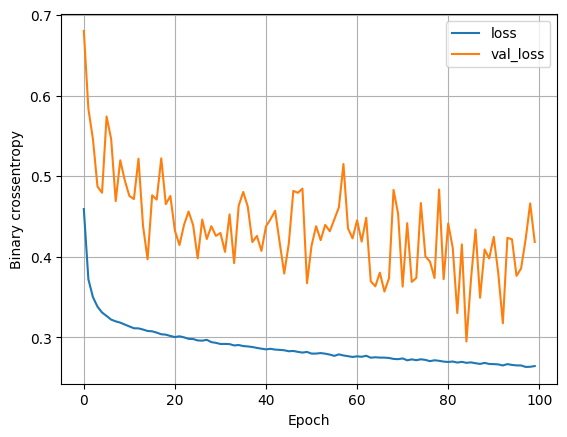

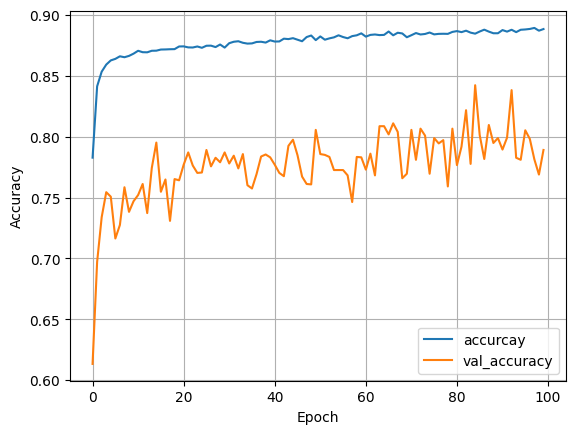

In [57]:
plot_loss(history)
plot_accuracy(history)

16 nodes, dropout 0, lr 0.01, batch size 32


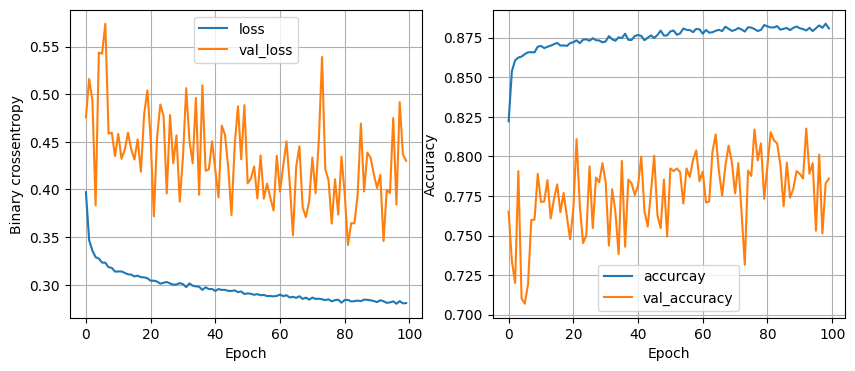

119/119 [==============================] - 0s 2ms/step - loss: 0.3341 - accuracy: 0.8707
16 nodes, dropout 0, lr 0.01, batch size 64


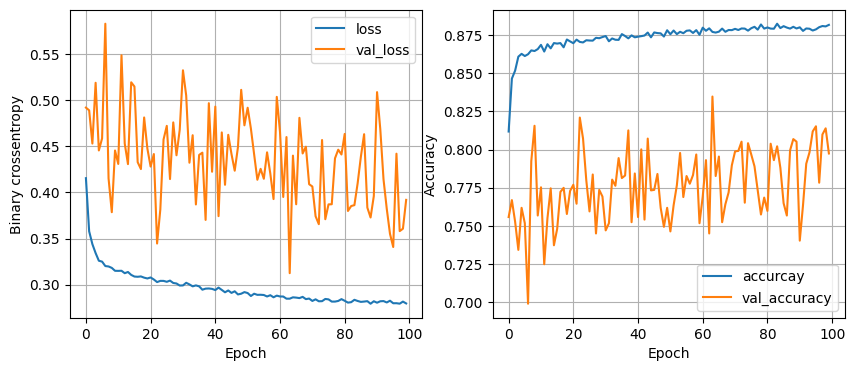

119/119 [==============================] - 0s 2ms/step - loss: 0.3518 - accuracy: 0.8630
16 nodes, dropout 0, lr 0.01, batch size 128


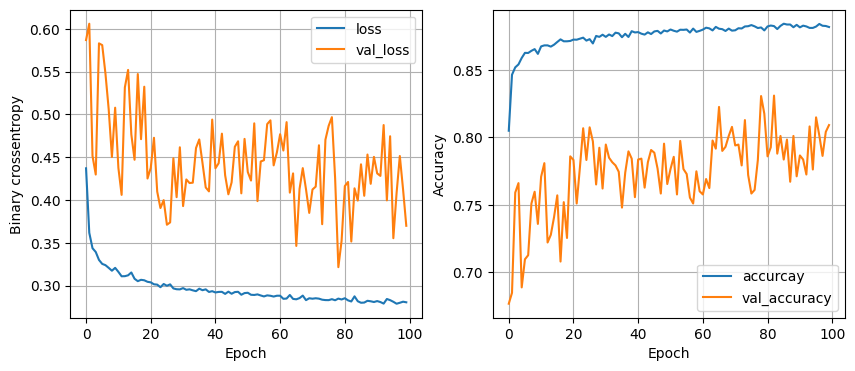

119/119 [==============================] - 0s 2ms/step - loss: 0.3437 - accuracy: 0.8604
16 nodes, dropout 0, lr 0.005, batch size 32


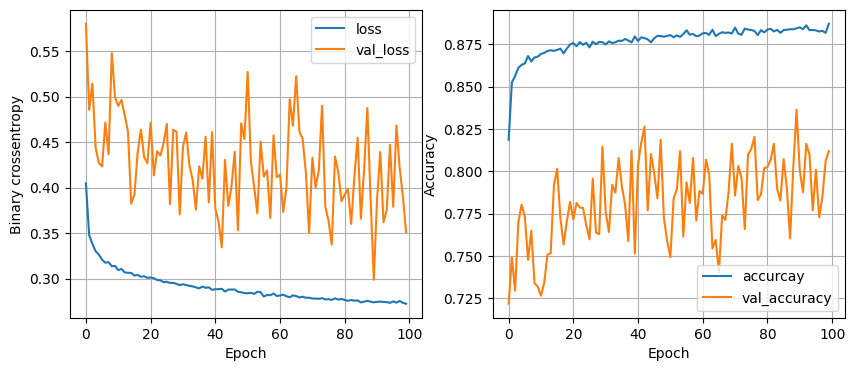

119/119 [==============================] - 0s 2ms/step - loss: 0.3340 - accuracy: 0.8659
16 nodes, dropout 0, lr 0.005, batch size 64


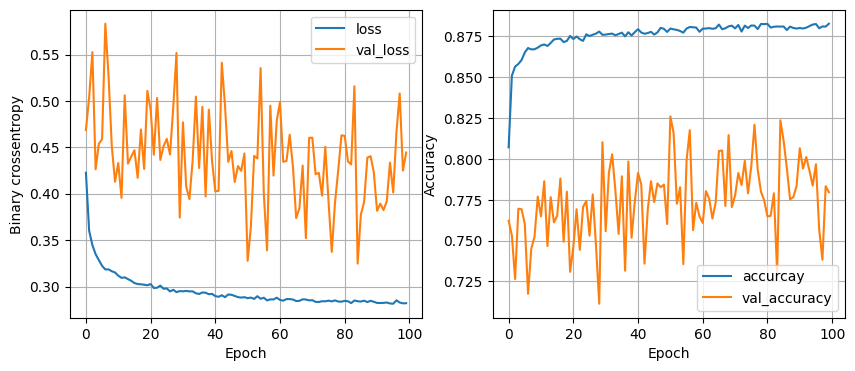

119/119 [==============================] - 0s 3ms/step - loss: 0.3367 - accuracy: 0.8670
16 nodes, dropout 0, lr 0.005, batch size 128


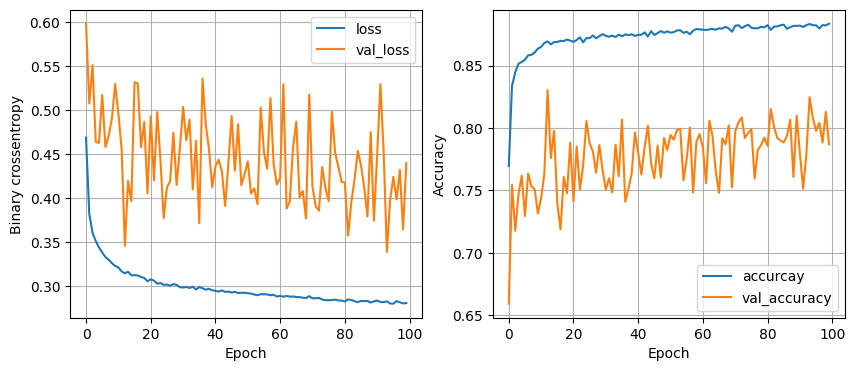

119/119 [==============================] - 0s 2ms/step - loss: 0.3174 - accuracy: 0.8730
16 nodes, dropout 0, lr 0.001, batch size 32


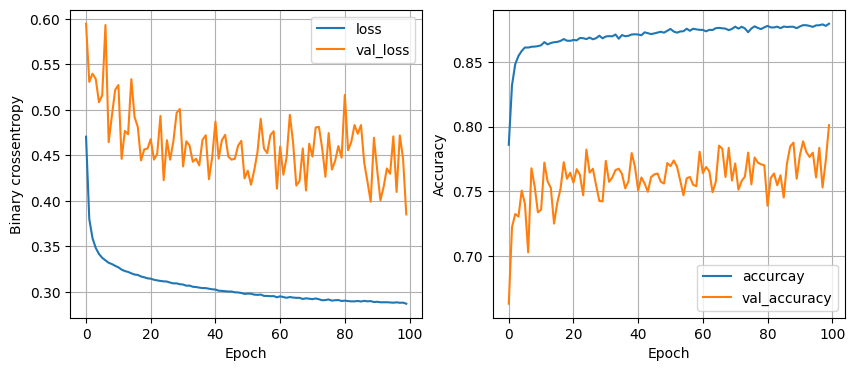

119/119 [==============================] - 0s 3ms/step - loss: 0.3324 - accuracy: 0.8641
16 nodes, dropout 0, lr 0.001, batch size 64


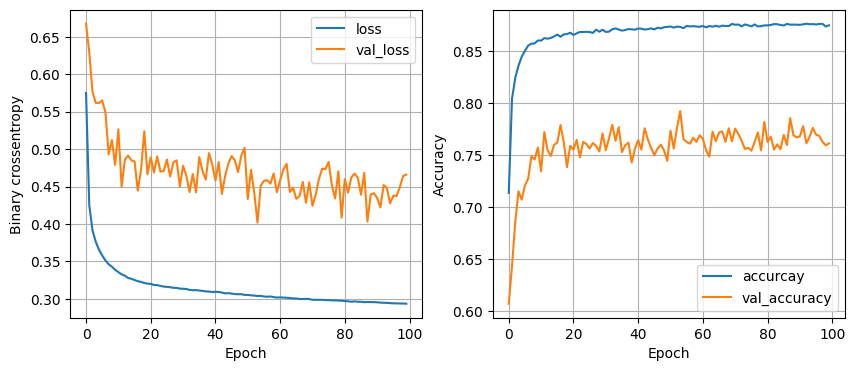

119/119 [==============================] - 0s 2ms/step - loss: 0.3269 - accuracy: 0.8683
16 nodes, dropout 0, lr 0.001, batch size 128


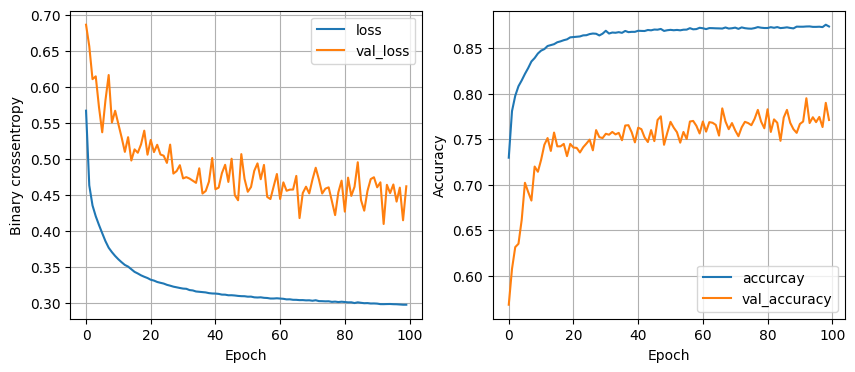

119/119 [==============================] - 0s 2ms/step - loss: 0.3309 - accuracy: 0.8638
16 nodes, dropout 0.2, lr 0.01, batch size 32


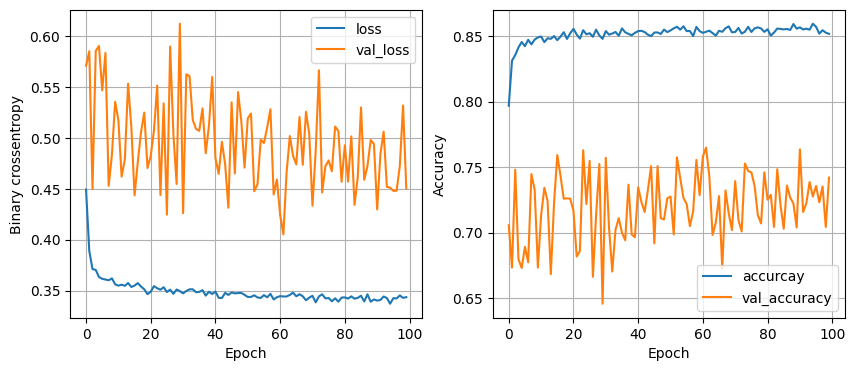

119/119 [==============================] - 0s 2ms/step - loss: 0.3332 - accuracy: 0.8625
16 nodes, dropout 0.2, lr 0.01, batch size 64


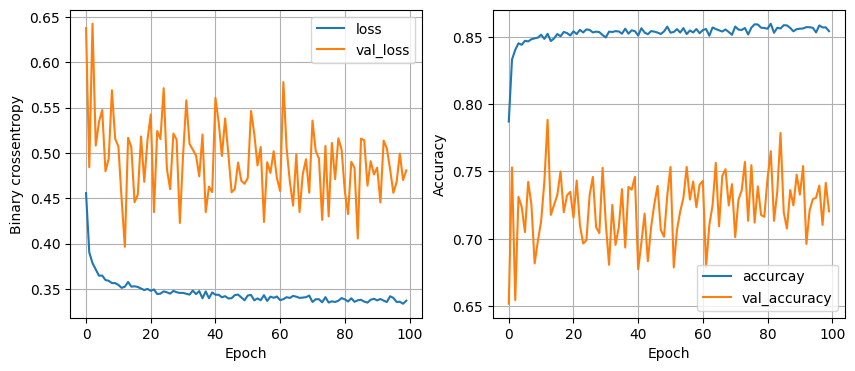

119/119 [==============================] - 0s 2ms/step - loss: 0.3337 - accuracy: 0.8628
16 nodes, dropout 0.2, lr 0.01, batch size 128


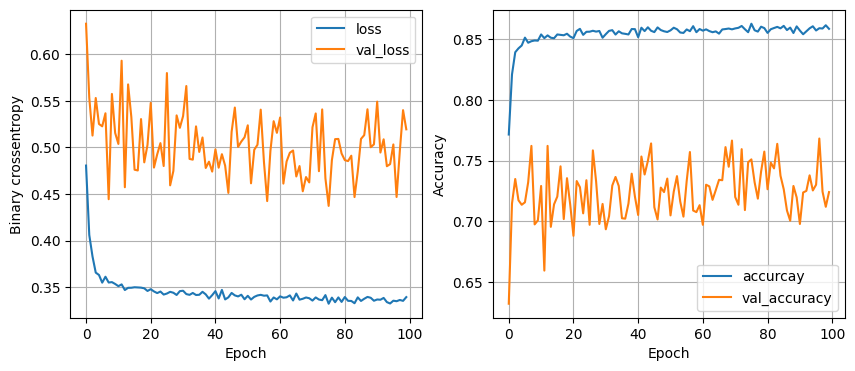

119/119 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.8693
16 nodes, dropout 0.2, lr 0.005, batch size 32


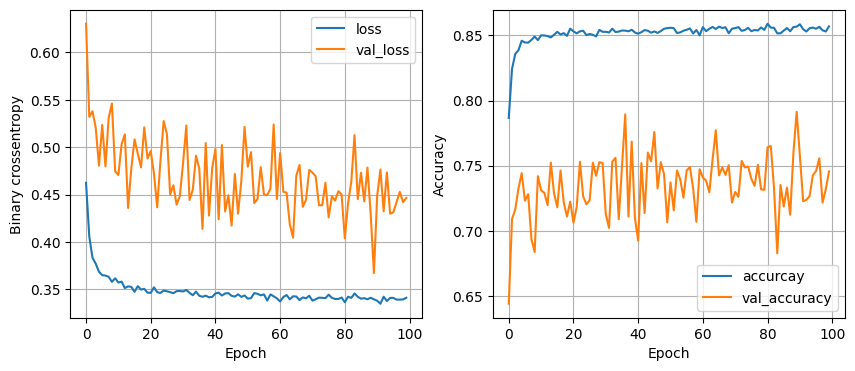

119/119 [==============================] - 0s 2ms/step - loss: 0.3382 - accuracy: 0.8586
16 nodes, dropout 0.2, lr 0.005, batch size 64


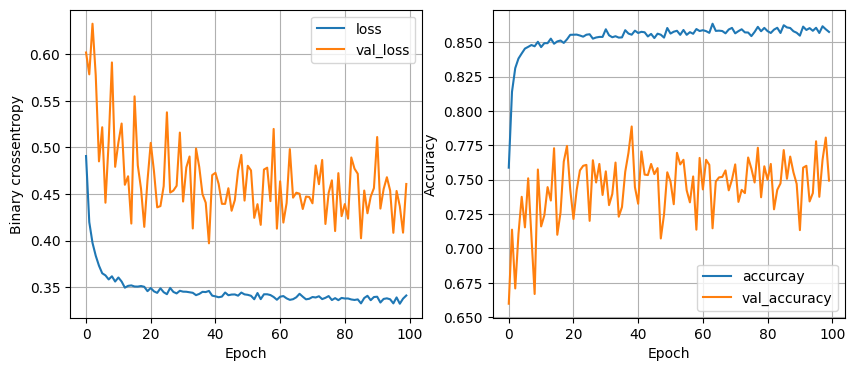

119/119 [==============================] - 0s 2ms/step - loss: 0.3271 - accuracy: 0.8670
16 nodes, dropout 0.2, lr 0.005, batch size 128


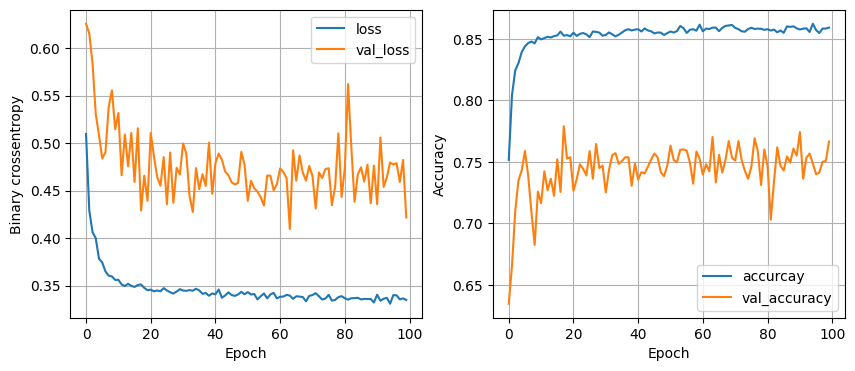

119/119 [==============================] - 0s 2ms/step - loss: 0.3388 - accuracy: 0.8672
16 nodes, dropout 0.2, lr 0.001, batch size 32


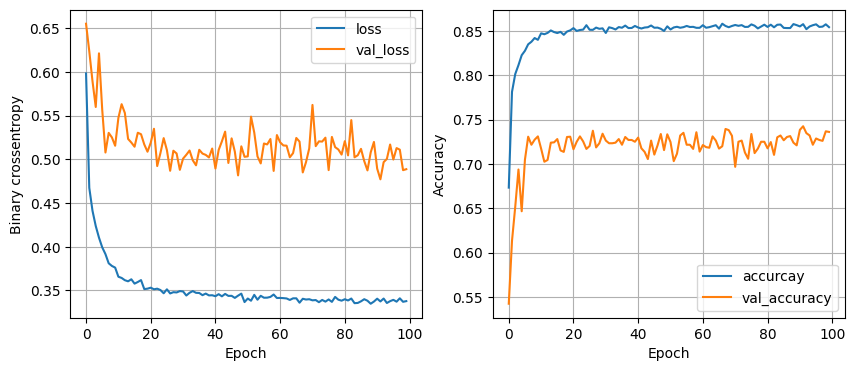

119/119 [==============================] - 0s 2ms/step - loss: 0.3306 - accuracy: 0.8649
16 nodes, dropout 0.2, lr 0.001, batch size 64


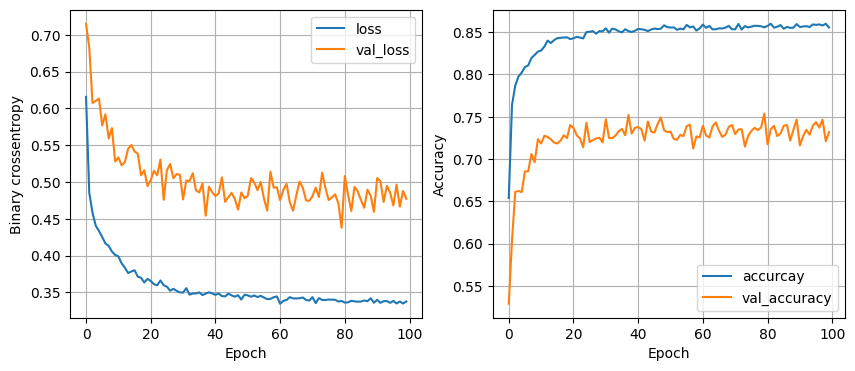

119/119 [==============================] - 0s 2ms/step - loss: 0.3238 - accuracy: 0.8688
16 nodes, dropout 0.2, lr 0.001, batch size 128


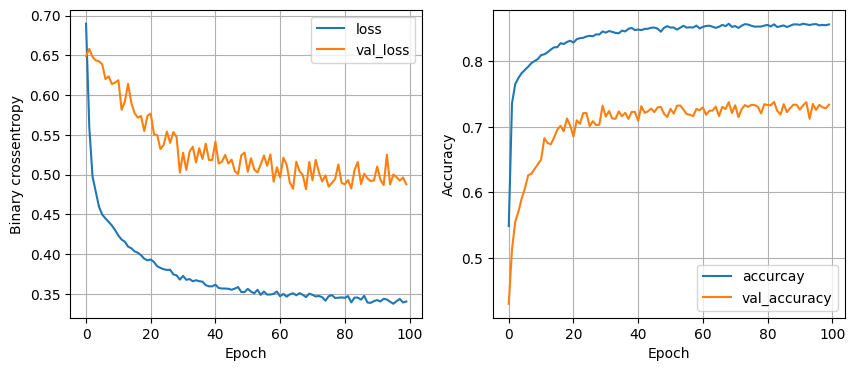

119/119 [==============================] - 0s 2ms/step - loss: 0.3306 - accuracy: 0.8672
32 nodes, dropout 0, lr 0.01, batch size 32


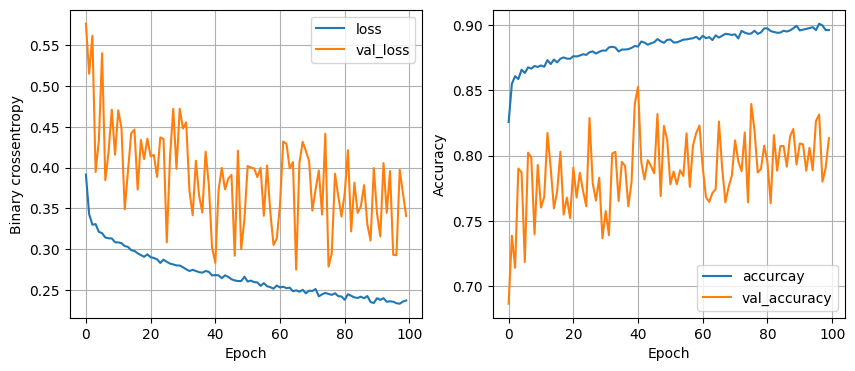

119/119 [==============================] - 0s 2ms/step - loss: 0.4223 - accuracy: 0.8646
32 nodes, dropout 0, lr 0.01, batch size 64


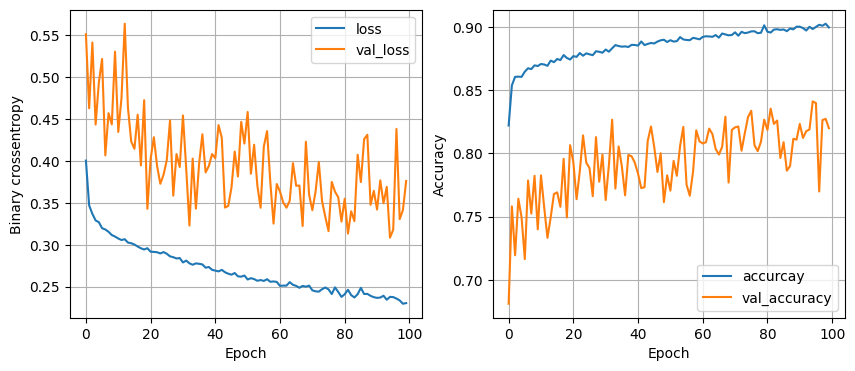

119/119 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.8620
32 nodes, dropout 0, lr 0.01, batch size 128


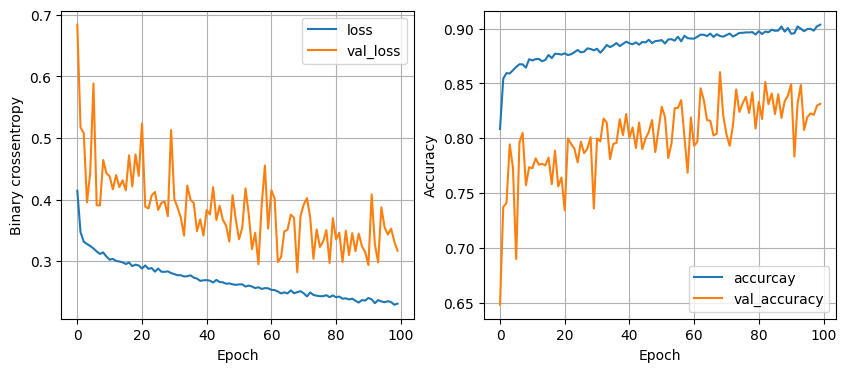

119/119 [==============================] - 0s 2ms/step - loss: 0.3722 - accuracy: 0.8678
32 nodes, dropout 0, lr 0.005, batch size 32


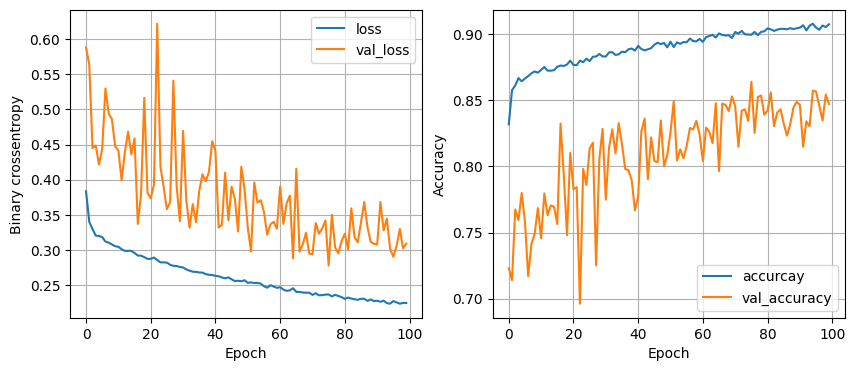

119/119 [==============================] - 0s 2ms/step - loss: 0.3859 - accuracy: 0.8549
32 nodes, dropout 0, lr 0.005, batch size 64


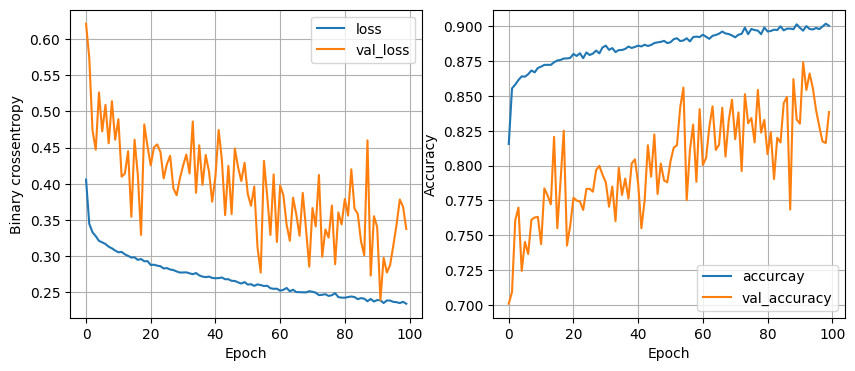

119/119 [==============================] - 0s 2ms/step - loss: 0.3700 - accuracy: 0.8657
32 nodes, dropout 0, lr 0.005, batch size 128


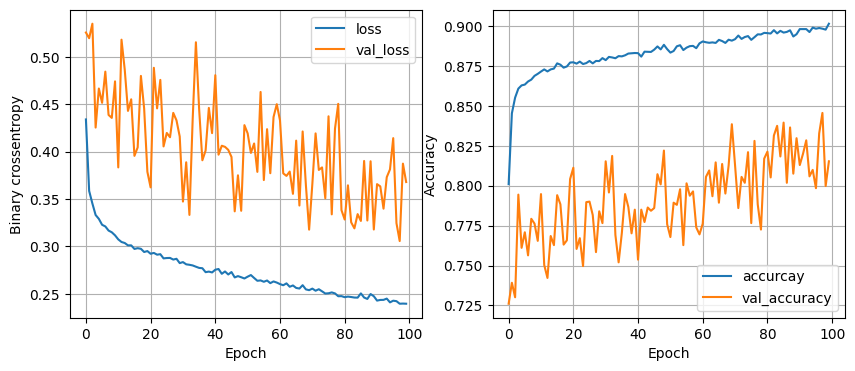

119/119 [==============================] - 0s 2ms/step - loss: 0.3563 - accuracy: 0.8628
32 nodes, dropout 0, lr 0.001, batch size 32


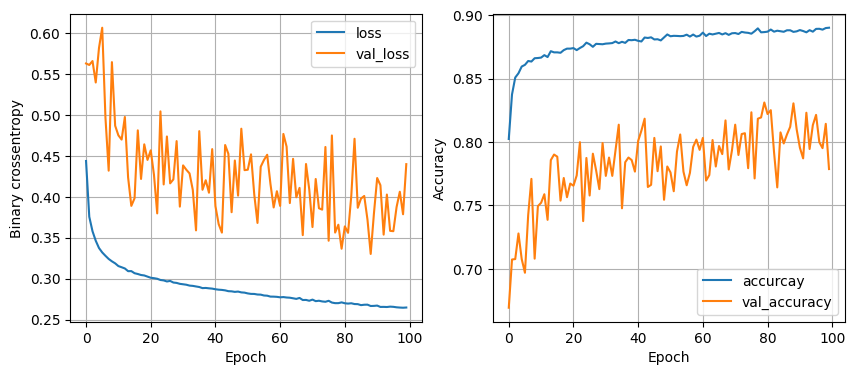

119/119 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.8730
32 nodes, dropout 0, lr 0.001, batch size 64


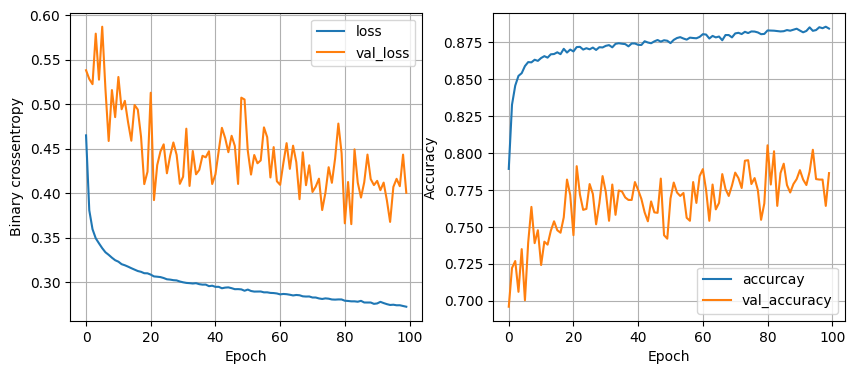

119/119 [==============================] - 0s 2ms/step - loss: 0.3222 - accuracy: 0.8691
32 nodes, dropout 0, lr 0.001, batch size 128


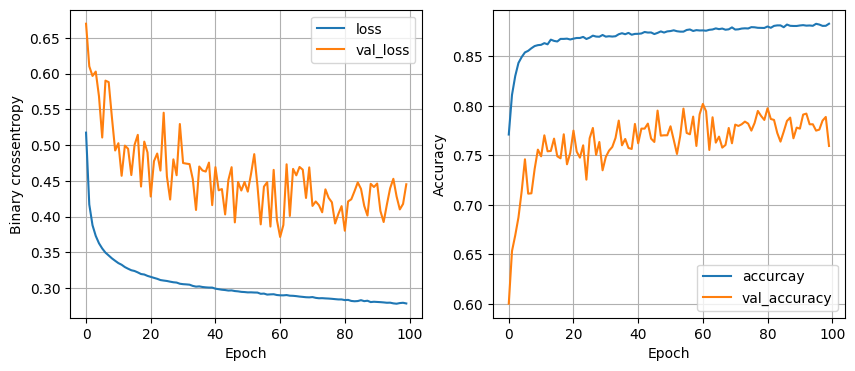

119/119 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8601
32 nodes, dropout 0.2, lr 0.01, batch size 32


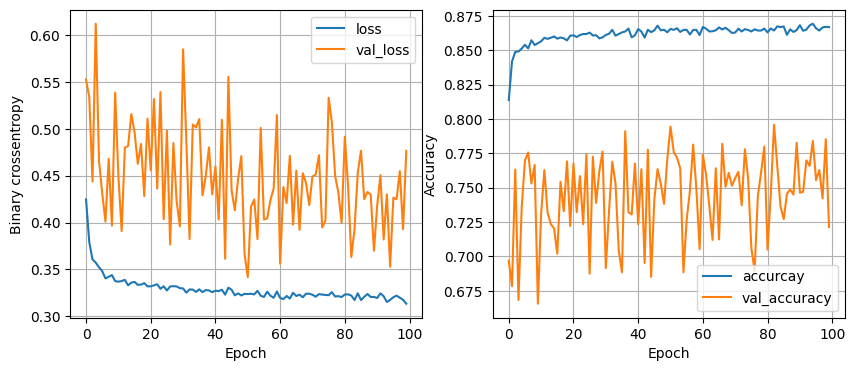

119/119 [==============================] - 0s 2ms/step - loss: 0.3354 - accuracy: 0.8599
32 nodes, dropout 0.2, lr 0.01, batch size 64


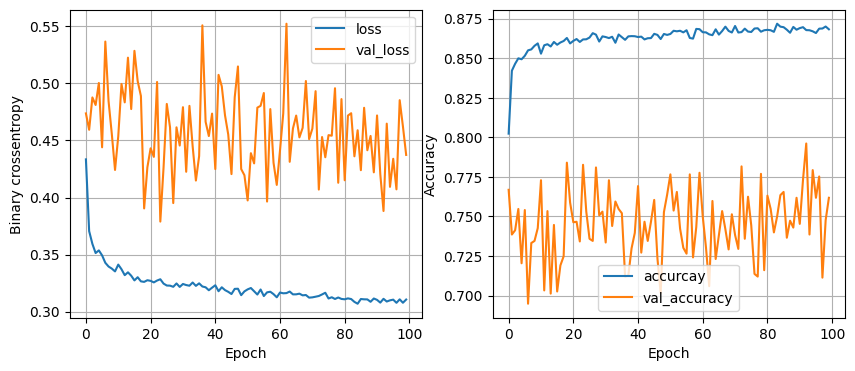

119/119 [==============================] - 0s 2ms/step - loss: 0.3139 - accuracy: 0.8688
32 nodes, dropout 0.2, lr 0.01, batch size 128


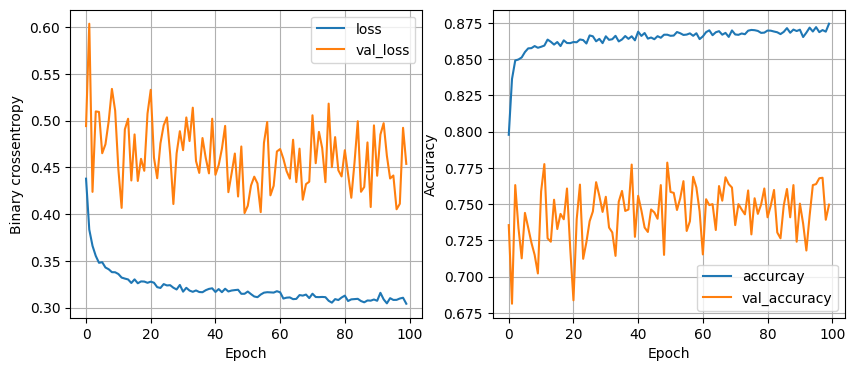

119/119 [==============================] - 0s 2ms/step - loss: 0.3135 - accuracy: 0.8736
32 nodes, dropout 0.2, lr 0.005, batch size 32


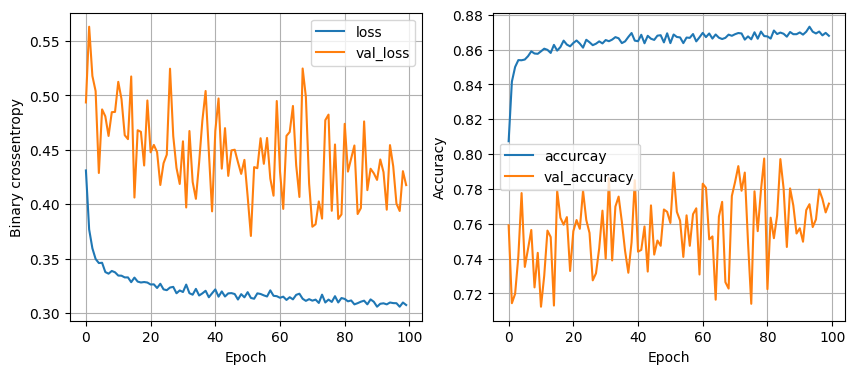

119/119 [==============================] - 0s 2ms/step - loss: 0.3208 - accuracy: 0.8688
32 nodes, dropout 0.2, lr 0.005, batch size 64


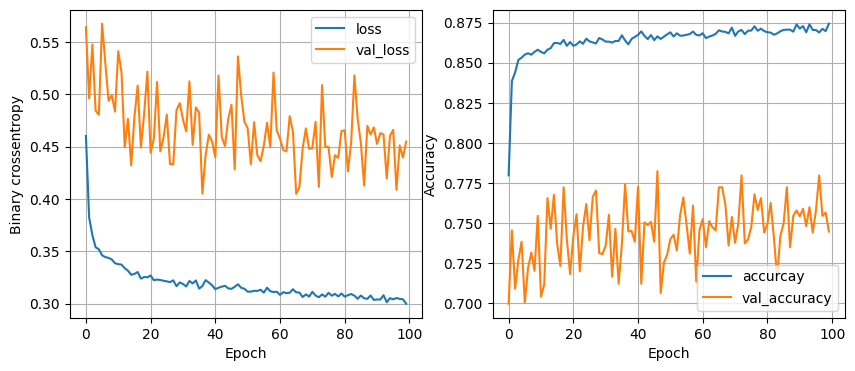

119/119 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.8691
32 nodes, dropout 0.2, lr 0.005, batch size 128


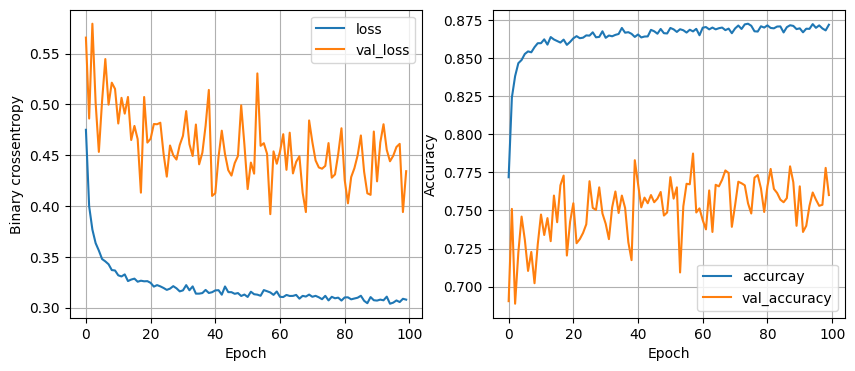

119/119 [==============================] - 0s 2ms/step - loss: 0.3202 - accuracy: 0.8686
32 nodes, dropout 0.2, lr 0.001, batch size 32


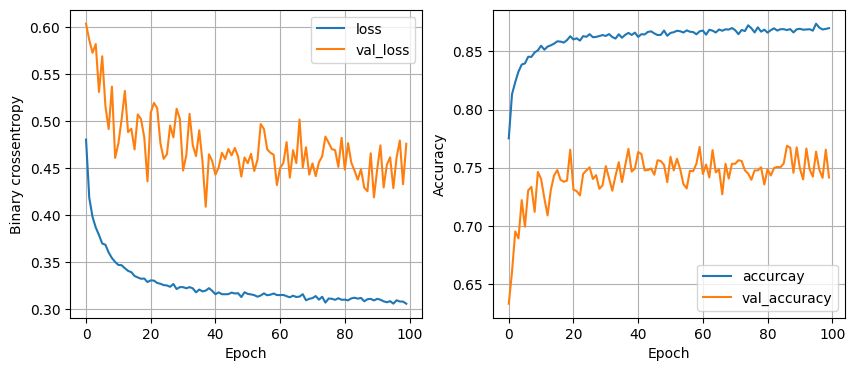

119/119 [==============================] - 0s 2ms/step - loss: 0.3219 - accuracy: 0.8665
32 nodes, dropout 0.2, lr 0.001, batch size 64


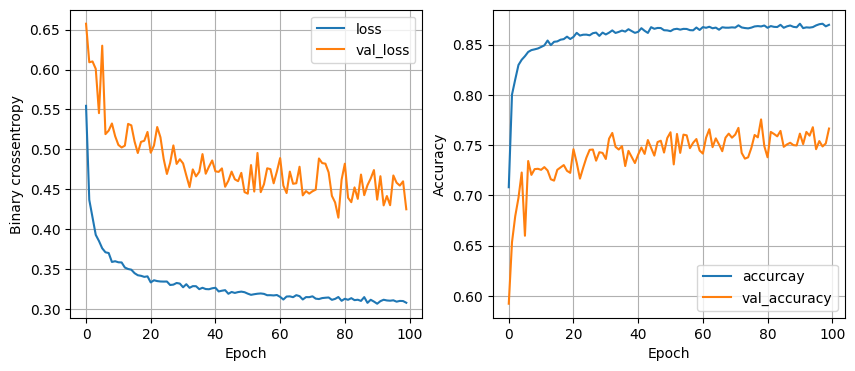

119/119 [==============================] - 0s 2ms/step - loss: 0.3171 - accuracy: 0.8717
32 nodes, dropout 0.2, lr 0.001, batch size 128


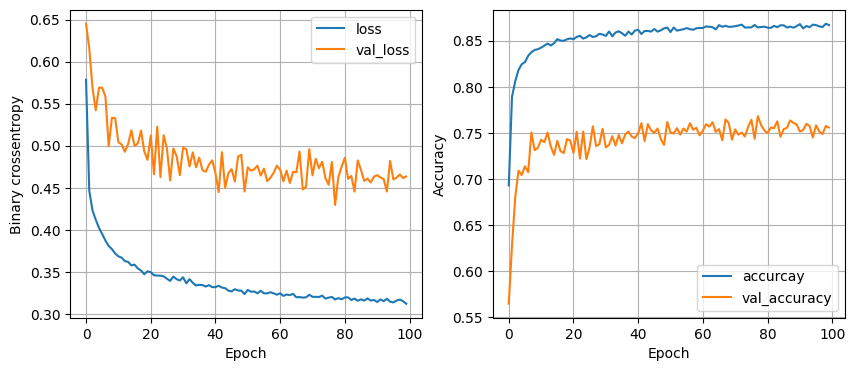

119/119 [==============================] - 0s 2ms/step - loss: 0.3190 - accuracy: 0.8691
64 nodes, dropout 0, lr 0.01, batch size 32


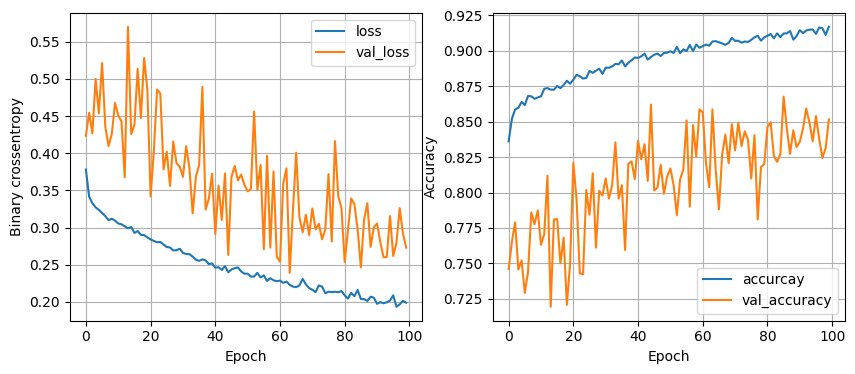

119/119 [==============================] - 0s 2ms/step - loss: 0.5369 - accuracy: 0.8573
64 nodes, dropout 0, lr 0.01, batch size 64


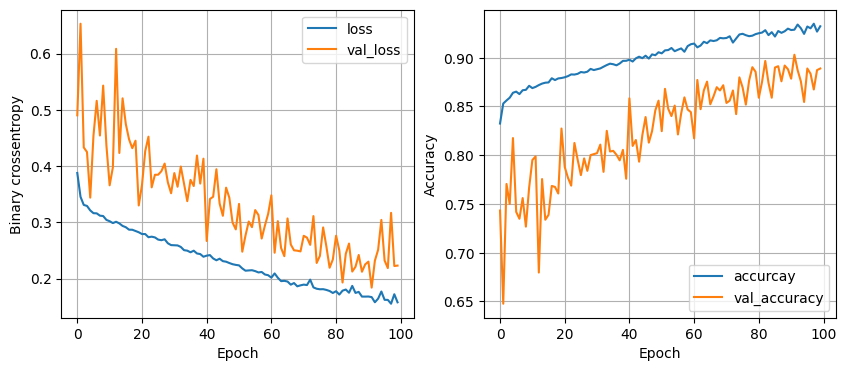

119/119 [==============================] - 0s 2ms/step - loss: 0.5730 - accuracy: 0.8538
64 nodes, dropout 0, lr 0.01, batch size 128


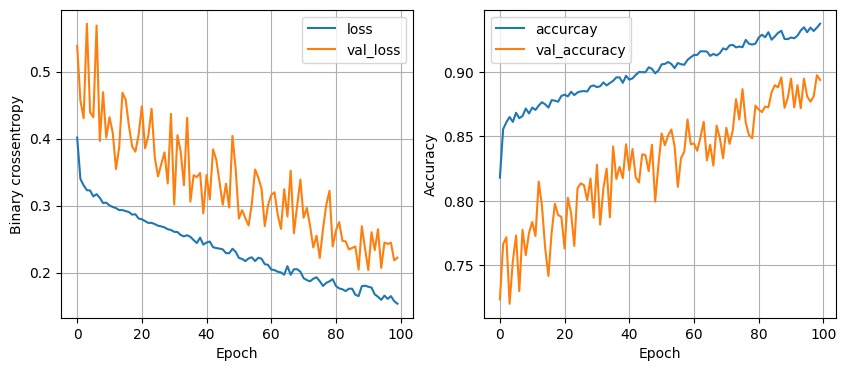

119/119 [==============================] - 0s 2ms/step - loss: 0.5861 - accuracy: 0.8507
64 nodes, dropout 0, lr 0.005, batch size 32


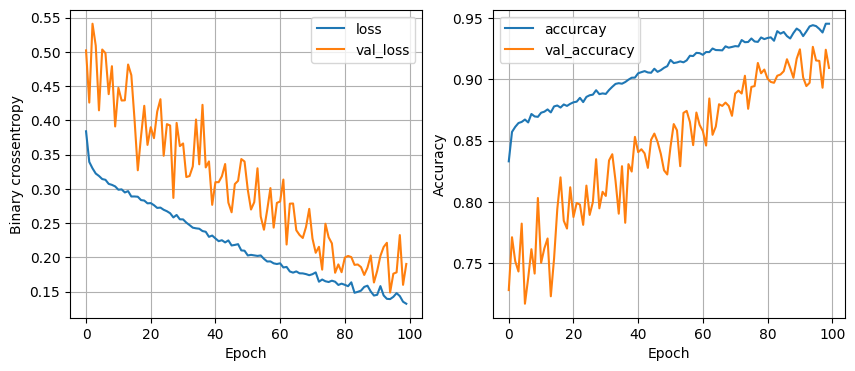

119/119 [==============================] - 0s 2ms/step - loss: 0.6416 - accuracy: 0.8517
64 nodes, dropout 0, lr 0.005, batch size 64


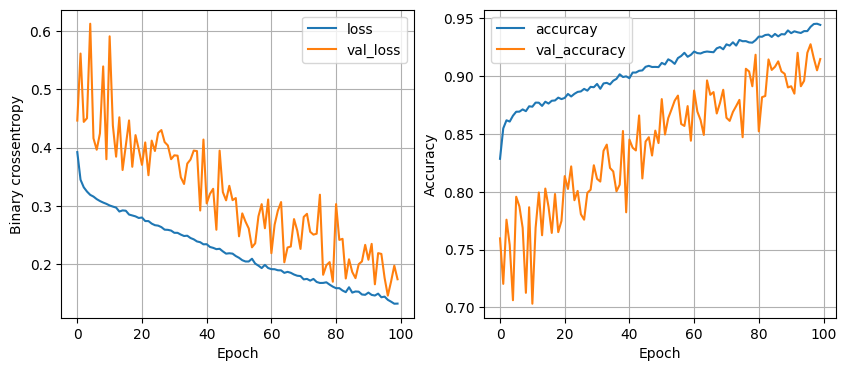

119/119 [==============================] - 0s 2ms/step - loss: 0.6005 - accuracy: 0.8536
64 nodes, dropout 0, lr 0.005, batch size 128


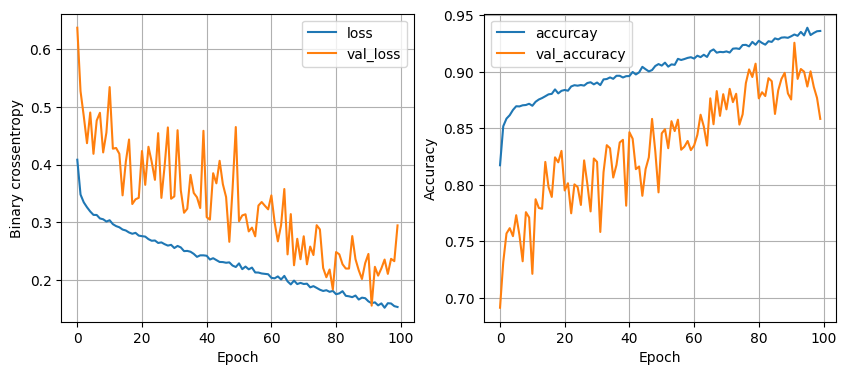

119/119 [==============================] - 0s 2ms/step - loss: 0.4987 - accuracy: 0.8601
64 nodes, dropout 0, lr 0.001, batch size 32


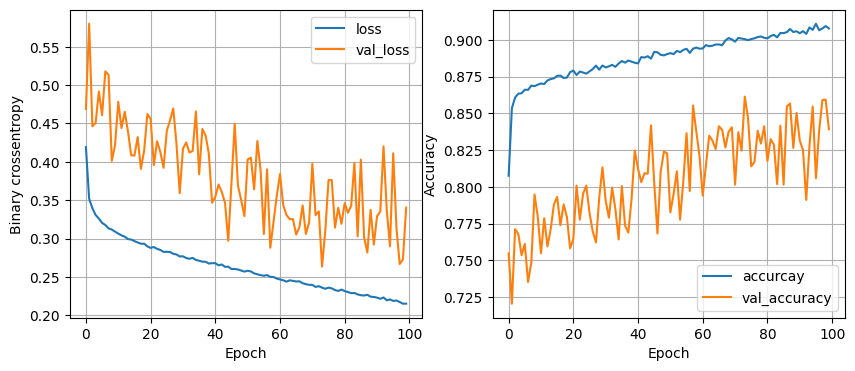

119/119 [==============================] - 0s 2ms/step - loss: 0.3607 - accuracy: 0.8601
64 nodes, dropout 0, lr 0.001, batch size 64


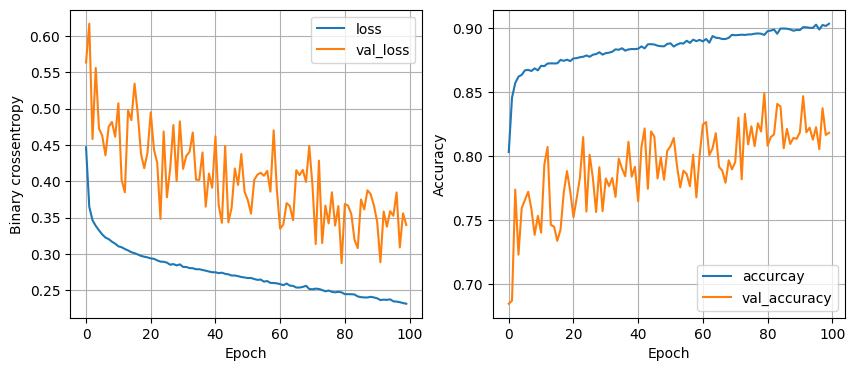

119/119 [==============================] - 0s 3ms/step - loss: 0.3399 - accuracy: 0.8638
64 nodes, dropout 0, lr 0.001, batch size 128


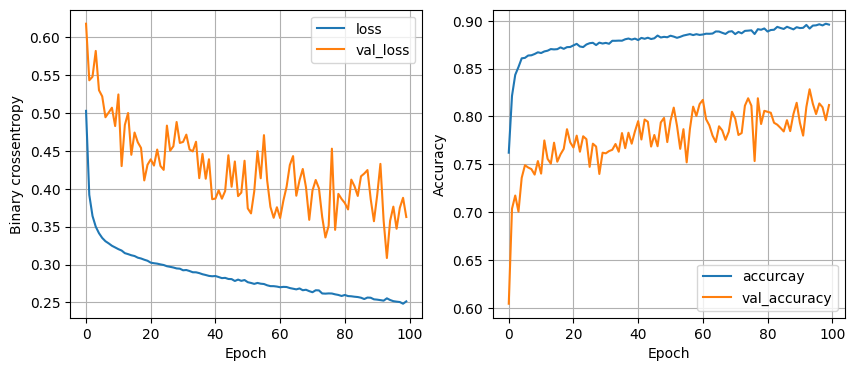

119/119 [==============================] - 0s 2ms/step - loss: 0.3274 - accuracy: 0.8699
64 nodes, dropout 0.2, lr 0.01, batch size 32


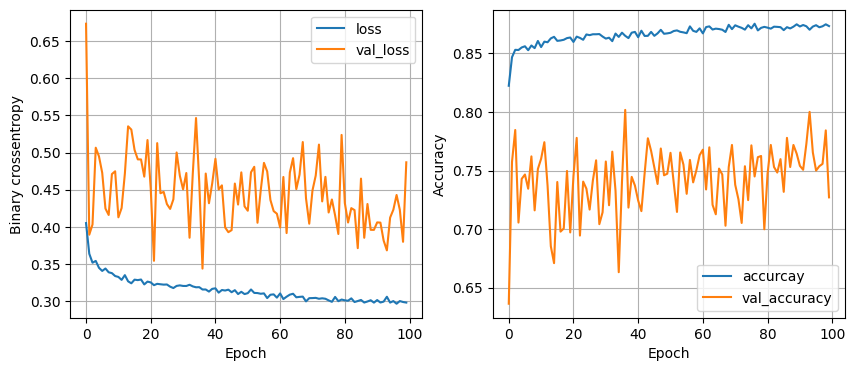

119/119 [==============================] - 0s 2ms/step - loss: 0.3318 - accuracy: 0.8696
64 nodes, dropout 0.2, lr 0.01, batch size 64


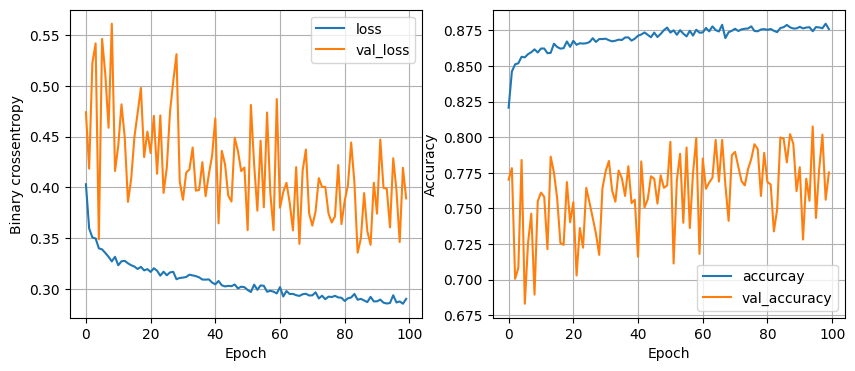

119/119 [==============================] - 0s 3ms/step - loss: 0.3231 - accuracy: 0.8704
64 nodes, dropout 0.2, lr 0.01, batch size 128


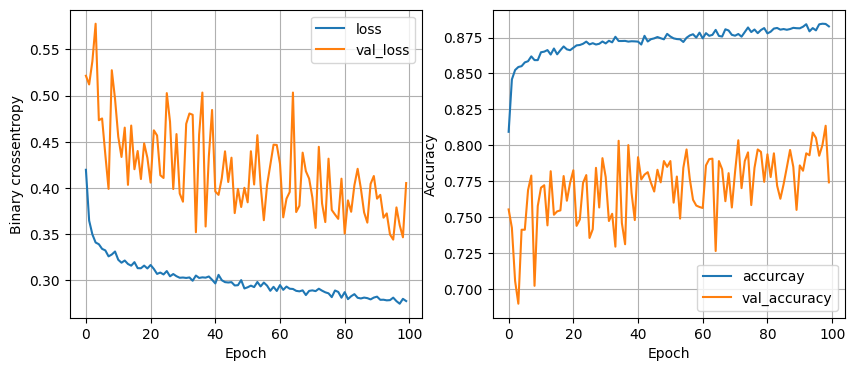

119/119 [==============================] - 0s 2ms/step - loss: 0.3262 - accuracy: 0.8736
64 nodes, dropout 0.2, lr 0.005, batch size 32


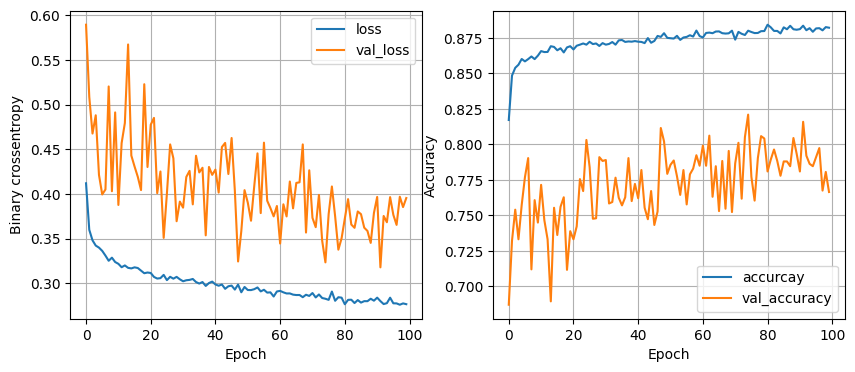

119/119 [==============================] - 0s 3ms/step - loss: 0.3200 - accuracy: 0.8715
64 nodes, dropout 0.2, lr 0.005, batch size 64


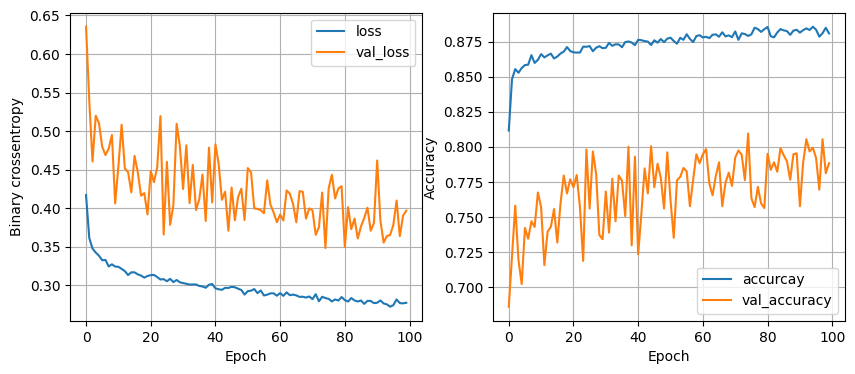

119/119 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.8751
64 nodes, dropout 0.2, lr 0.005, batch size 128


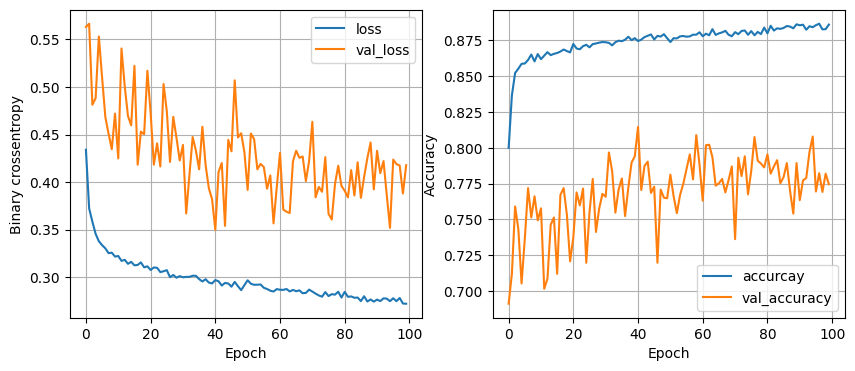

119/119 [==============================] - 0s 2ms/step - loss: 0.3095 - accuracy: 0.8709
64 nodes, dropout 0.2, lr 0.001, batch size 32


In [ ]:
least_val_loss = [float('inf'), float('inf')]
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot(history)
        val_loss = model.evaluate(x_valid, y_valid)
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [66]:
least_val_loss

[0.3086607754230499, 0.8756572008132935]

In [68]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1, )

119/119 [==============================] - 0s 1ms/step


In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1359
           1       0.88      0.95      0.91      2445

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

